In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Implemented a locally weighted linear regression learner to solve the best fit problem for 1 dimensional data.

In [2]:
def readData(string):
    df = pd.read_csv(string, sep=",", index_col=False)
    df.columns = ["x", "y"]
    data = np.array(df, dtype=float)
    return data[:, :-1], data[:, -1], df

In [3]:
def wm(point, X, tau): 
    m = X.shape[0] 
    w = np.mat(np.eye(m)) 
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return w

In [4]:
def predict(X, y, point, tau = 0.176): 
    
    m = X.shape[0] 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    point_ = np.array([point, 1], dtype=object) 
    w = wm(point_, X_, tau)
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    pred = np.dot(point_, theta) 
    
    return theta, pred

In [6]:
def plot_predictions(X, y, tau, nval):

    X_test, y_test, df_test = readData("1c_testing.csv")
 
    preds = [] 
 
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)

    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)

    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') 
    plt.show()

In [5]:
def error(X_test, y_test, tau):
    preds = []
    nval = X_test.shape[0]
    for x in X_test:
        theta, pred = predict(X, y, x, tau)
        preds.append(pred)
    preds = np.array(preds).reshape(nval,1)
    
    MSE = np.square(np.subtract(y_test,preds)).mean() 
 
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:\n")
    print(RMSE)

### Applied the locally weighted linear regression learner to the data set and displayed the resulting function together with the data points

In [7]:
X, y, df = readData('1b_training.csv')
y = y.reshape(y.shape[0], 1)
X_test, y_test, df_test = readData("1c_testing.csv")

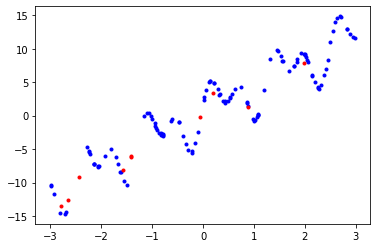

In [12]:
plot_predictions(X, y, 0.176, 10)

### Evaluated the locally weighted linear regression on the Test data. Compared it with the linear regressor problem as descirbed in the previous file

In [11]:
error(X_test, y_test, 0.176)

Root Mean Square Error:

10.171271655812628


The predictions on the test data given in the question is better for the hypothesis function developed in the above block. It can be inferred from the RMSE value of both the models respectively where RMSE for locally weighted linear regression is more than that of model developed by linear regression. 

### Repeated the experiment and evaluation using only the first 20 elements of the training data set. Compared the results with the linear regressor and explanation

In [13]:
def error(X_test, y_test, tau):
    preds = []
    nval = X_test.shape[0]
    for x in X_test:
        theta, pred = predict(X[:20], y[:20], x, tau)
        preds.append(pred)
    preds = np.array(preds).reshape(nval,1)
    
    MSE = np.square(np.subtract(y_test,preds)).mean() 
 
    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:\n")
    print(RMSE)

In [14]:
error(X_test, y_test, 0.176)

Root Mean Square Error:

10.8714393322233


The predictions on the test data given for the first 20 elements of the training data is better for the hypothesis function developed in question 1. It can be inferred from the RMSE value of both the models respectively where RMSE for locally weighted linear regression is more than that of the model developed by linear regression. The linear regression model performed better in this case too. <br>
This is because the hypothesis function of linear regression model nicely fits the test data given than that of locally weighted linear regression.

Given the results from the above parts, the data set used was actually derived from a function that is consostent with the function format in previous problem statement. From the results obtained from the previous parts that turns out to be bad as compared to that of linear regression it can be inferred the same discussed.